In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [9]:
covidt = pd.read_csv("covid_datay.csv")
covids = pd.read_csv("covid_data.csv")

location = covidt["Location"]
totalcases = covidt["total_cases"]
totaldeaths = covidt["total_deaths"]
totalvaccinations = covidt["total_vaccinations"]

In [16]:
#covidt = pd.read_csv("covid_datay.csv")

covidt = covidt[["Location", "Date", "new_cases", "new_deaths", "new_vaccinations"]]

countriesOfInterest = ["Canada", "India", "Brazil", "United States", "Italy"] #Filter by locations
covidt = covidt[covidt["Location"].isin(countriesOfInterest)]

covidt = covidt[~covidt["new_vaccinations"].isna()] #Remove rows with missing vaccination data

covidt = covidt.groupby(["Location", "Date"]).agg({ #Group by location and date, sum each
    "new_cases":"sum", 
    "new_deaths":"sum",
    "new_vaccinations":"sum"
}).reset_index()

print(covidt)

         Location  Date   new_cases  new_deaths  new_vaccinations
0          Brazil  2021  13655283.0    409036.0      3.307363e+08
1          Brazil  2022  11029572.0     58452.0      1.269385e+08
2          Brazil  2023    301811.0      1526.0      1.272004e+06
3          Canada  2021   1633486.0     14585.0      6.874038e+07
4          Canada  2022   2263518.0     18725.0      2.707897e+07
5          Canada  2023     55310.0      1241.0      6.223620e+05
6           India  2021  21695999.0    294745.0      1.379581e+09
7           India  2022   9672000.0     47003.0      7.267105e+08
8           India  2023      3990.0        35.0      2.818369e+06
9           Italy  2021   4018517.0     63243.0      1.113261e+08
10          Italy  2022  19018022.0     47240.0      3.201690e+07
11          Italy  2023    310084.0      2191.0      2.917020e+05
12  United States  2021  34687732.0    475075.0      5.153550e+08
13  United States  2022  45874319.0    267885.0      1.445727e+08
14  United

In [18]:
sortcovidcases = covidt[["Location", "Date", "new_cases"]]
sortcovidcases = sortcovid.sort_values("new_cases", ascending=False).reset_index(drop=True)
print(sortcovidcases)

         Location  Date   new_cases
0   United States  2022  45874319.0
1   United States  2021  34687732.0
2           India  2021  21695999.0
3           Italy  2022  19018022.0
4          Brazil  2021  13655283.0
5          Brazil  2022  11029572.0
6           India  2022   9672000.0
7           Italy  2021   4018517.0
8          Canada  2022   2263518.0
9          Canada  2021   1633486.0
10  United States  2023   1315201.0
11          Italy  2023    310084.0
12         Brazil  2023    301811.0
13         Canada  2023     55310.0
14          India  2023      3990.0


In [17]:
sortcoviddeaths = covidt[["Location", "Date", "new_deaths"]]
sortcoviddeaths = sortcoviddeaths.sort_values("new_deaths", ascending=False).reset_index(drop=True)
print(sortcoviddeaths)

         Location  Date  new_deaths
0   United States  2021    475075.0
1          Brazil  2021    409036.0
2           India  2021    294745.0
3   United States  2022    267885.0
4           Italy  2021     63243.0
5          Brazil  2022     58452.0
6           Italy  2022     47240.0
7           India  2022     47003.0
8          Canada  2022     18725.0
9          Canada  2021     14585.0
10  United States  2023     12313.0
11          Italy  2023      2191.0
12         Brazil  2023      1526.0
13         Canada  2023      1241.0
14          India  2023        35.0


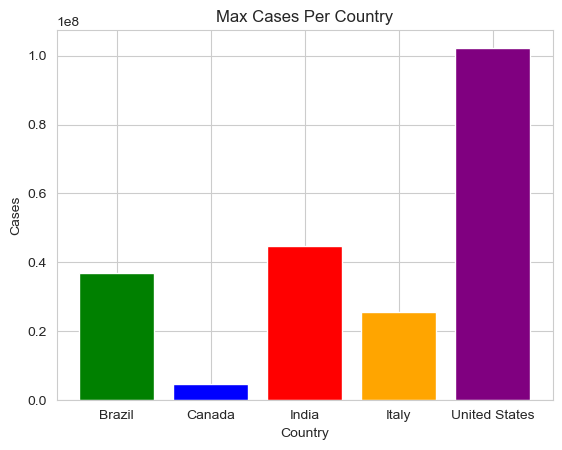

In [25]:
covidt = pd.read_csv("covid_datay.csv")

sns.set_style("whitegrid")
colors = ["green", "blue", "red", "orange", "purple"]

countriesOfInterest = ["Canada", "India", "Brazil", "United States", "Italy"] #Filter by locations
covidt = covidt[covidt["Location"].isin(countriesOfInterest)]

maxcases = covidt.groupby("Location")["total_cases"].max()

plt.bar(maxcases.index, maxcases.values, color=colors)
plt.title("Max Cases Per Country")
plt.xlabel("Country")
plt.ylabel("Cases")
plt.show()

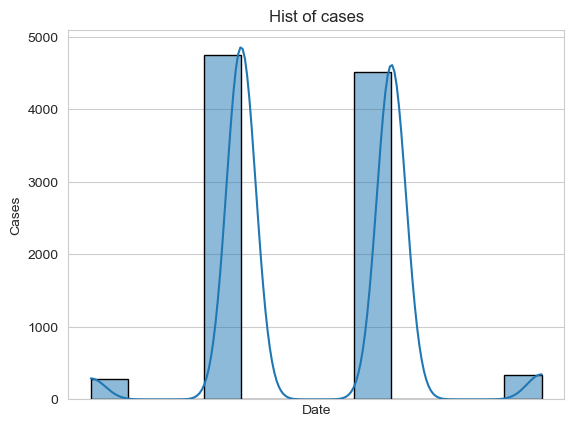

In [33]:
covids = pd.read_csv("covid_datay.csv")
countries = ["United States", "India", "Brazil", "Italy", "Canada"]
covidt = covidt[covidt["Location"].isin(countries)]

covids["Date"] = pd.to_datetime(covids["Date"])

sns.histplot(covids["Date"], bins=12, kde=True, edgecolor="black")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.title("Hist of cases")
plt.show()

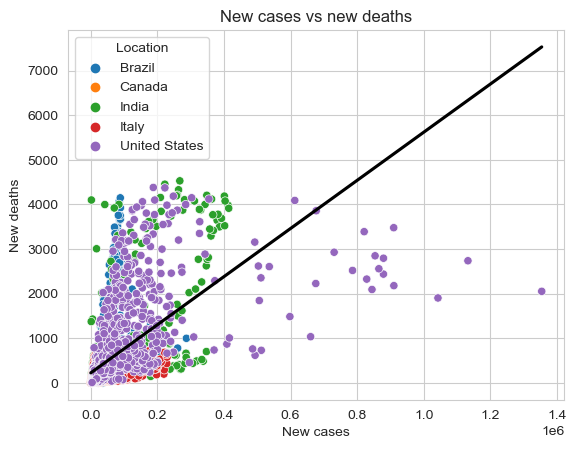

In [38]:
countries = ["United States", "India", "Brazil", "Italy", "Canada"]
covidt = covidt[covidt["Location"].isin(countries)]

sns.set_style("whitegrid")
sns.scatterplot(data=covidt, x="new_cases", y="new_deaths", hue="Location")
sns.regplot(data=covidt, x="new_cases", y="new_deaths", scatter=False, ci=None, color="black")

plt.title("New cases vs new deaths")
plt.xlabel("New cases")
plt.ylabel("New deaths")
plt.show()

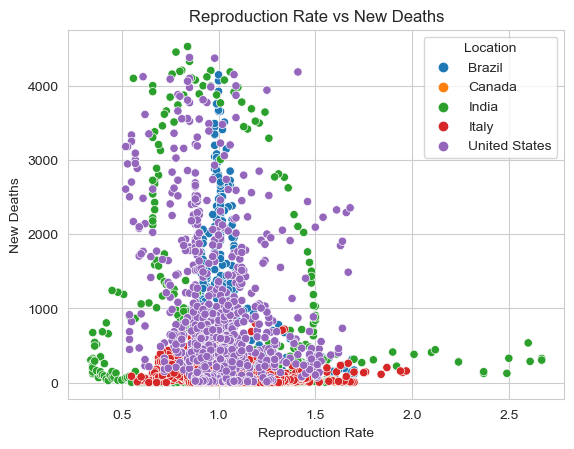

In [40]:
countries = ["United States", "India", "Brazil", "Italy", "Canada"]
covidt = covidt[covidt["Location"].isin(countries)]

sns.set_style("whitegrid")
sns.scatterplot(data=covidt, x="reproduction_rate", y="new_deaths", hue="Location")
#sns.regplot(data=covidt, x="new_cases", y="new_deaths", scatter=False, ci=None, color="black")

plt.title("Reproduction Rate vs New Deaths")
plt.xlabel("Reproduction Rate")
plt.ylabel("New Deaths")
plt.show()

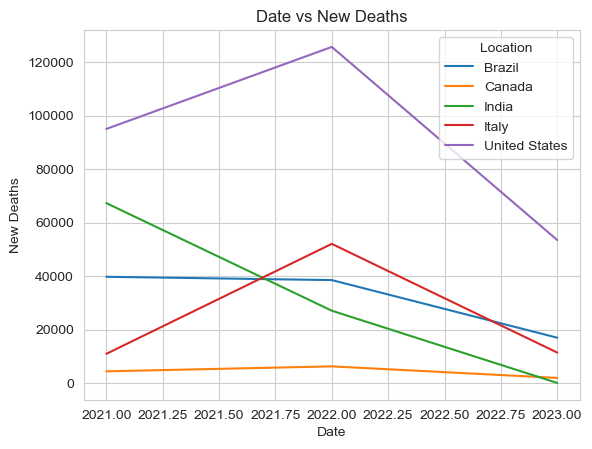

In [43]:
countries = ["United States", "India", "Brazil", "Italy", "Canada"]
covidt = covidt[covidt["Location"].isin(countries)]

sns.set_style("whitegrid")
sns.lineplot(data=covidt, x="Date", y="new_cases", hue="Location", errorbar=None)
#sns.regplot(data=covidt, x="new_cases", y="new_deaths", scatter=False, ci=None, color="black")

plt.title("Date vs New Deaths")
plt.xlabel("Date")
plt.ylabel("New Deaths")
plt.show()

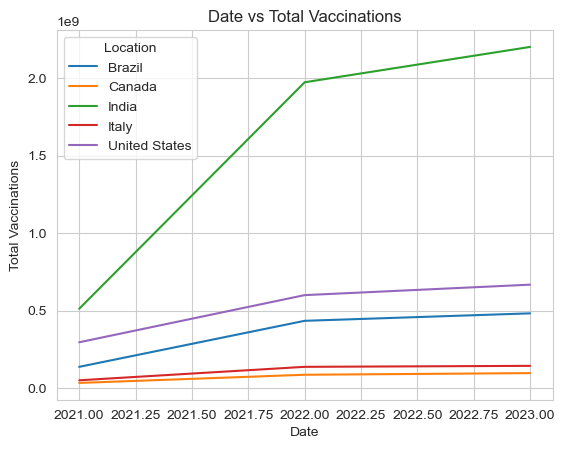

In [44]:
countries = ["United States", "India", "Brazil", "Italy", "Canada"]
covidt = covidt[covidt["Location"].isin(countries)]

sns.set_style("whitegrid")
sns.lineplot(data=covidt, x="Date", y="total_vaccinations", hue="Location", errorbar=None)
#sns.regplot(data=covidt, x="new_cases", y="new_deaths", scatter=False, ci=None, color="black")

plt.title("Date vs Total Vaccinations")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.show()

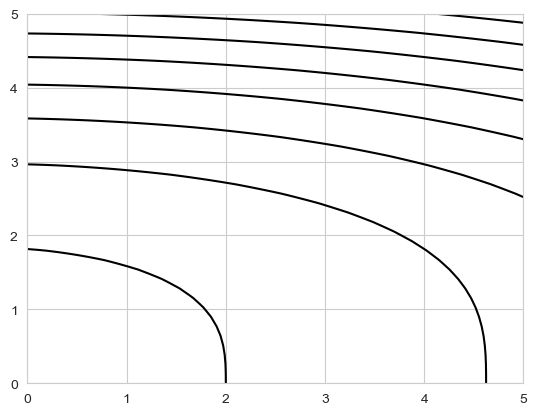

In [52]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
def f(x, y):
    return x+x**2+y**3 + 14

Z = f(X,Y)
plt.contour(X,Y,Z, colors="black")
plt.show()